In [1]:
import tensorflow as tf    

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=tf.keras.datasets.mnist
from tensorflow.keras.optimizers import SGD


In [4]:
(x_train,y_train),(x_test,y_test)=data.load_data()   

In [5]:
x_test.shape         

(10000, 28, 28)

In [6]:
x_train.shape    

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
x_train,x_test =x_train/255,x_test/255      

In [9]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),      
tf.keras.layers.Dense(150,activation='relu'),      
tf.keras.layers.Dense(10,activation='softmax')    

In [10]:

sgd=SGD(0.02)    

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [11]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6353 - accuracy: 0.8403 - val_loss: 0.3544 - val_accuracy: 0.9021
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3377 - accuracy: 0.9062 - val_loss: 0.2932 - val_accuracy: 0.9179
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2914 - accuracy: 0.9184 - val_loss: 0.2623 - val_accuracy: 0.9264
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2627 - accuracy: 0.9258 - val_loss: 0.2417 - val_accuracy: 0.9315
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2404 - accuracy: 0.9322 - val_loss: 0.2229 - val_accuracy: 0.9363


In [12]:

test_loss,test_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9363


313/313 [==============================] - 0s 900us/step
4


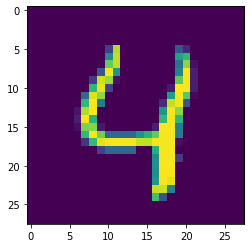

In [13]:
plt.imshow(x_test[4])
prediction=model.predict(x_test)   
print(np.argmax(prediction[4]))  


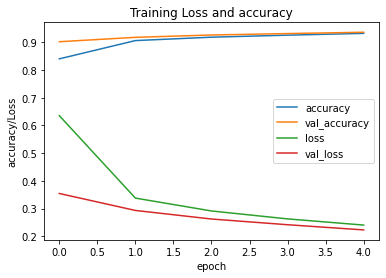

In [14]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()